In [3]:
import pandas as pd

# Load the uploaded Walmart sales data
file_path = "F:\\INTERNSHIP\\Walmart_Sales.csv"
df = pd.read_csv(file_path)

# Display basic information and the first few rows
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


(None,
    Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
 0      1  05-02-2010    1643690.90             0        42.31       2.572   
 1      1  12-02-2010    1641957.44             1        38.51       2.548   
 2      1  19-02-2010    1611968.17             0        39.93       2.514   
 3      1  26-02-2010    1409727.59             0        46.63       2.561   
 4      1  05-03-2010    1554806.68             0        46.50       2.625   
 
           CPI  Unemployment  
 0  211.096358         8.106  
 1  211.242170         8.106  
 2  211.289143         8.106  
 3  211.319643         8.106  
 4  211.350143         8.106  )

In [4]:
# Step 1: Data Cleaning
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()

# Step 2: Summary Statistics
summary_stats = df.describe()

missing_values, duplicates, summary_stats


(Store           0
 Date            0
 Weekly_Sales    0
 Holiday_Flag    0
 Temperature     0
 Fuel_Price      0
 CPI             0
 Unemployment    0
 dtype: int64,
 0,
              Store                 Date  Weekly_Sales  Holiday_Flag  \
 count  6435.000000                 6435  6.435000e+03   6435.000000   
 mean     23.000000  2011-06-17 00:00:00  1.046965e+06      0.069930   
 min       1.000000  2010-02-05 00:00:00  2.099862e+05      0.000000   
 25%      12.000000  2010-10-08 00:00:00  5.533501e+05      0.000000   
 50%      23.000000  2011-06-17 00:00:00  9.607460e+05      0.000000   
 75%      34.000000  2012-02-24 00:00:00  1.420159e+06      0.000000   
 max      45.000000  2012-10-26 00:00:00  3.818686e+06      1.000000   
 std      12.988182                  NaN  5.643666e+05      0.255049   
 
        Temperature   Fuel_Price          CPI  Unemployment  
 count  6435.000000  6435.000000  6435.000000   6435.000000  
 mean     60.663782     3.358607   171.578394      7.99

Matplotlib created a temporary cache directory at C:\Users\saransh\AppData\Local\Temp\matplotlib-_c00gc5d because the default path (C:\Users\saransh\.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


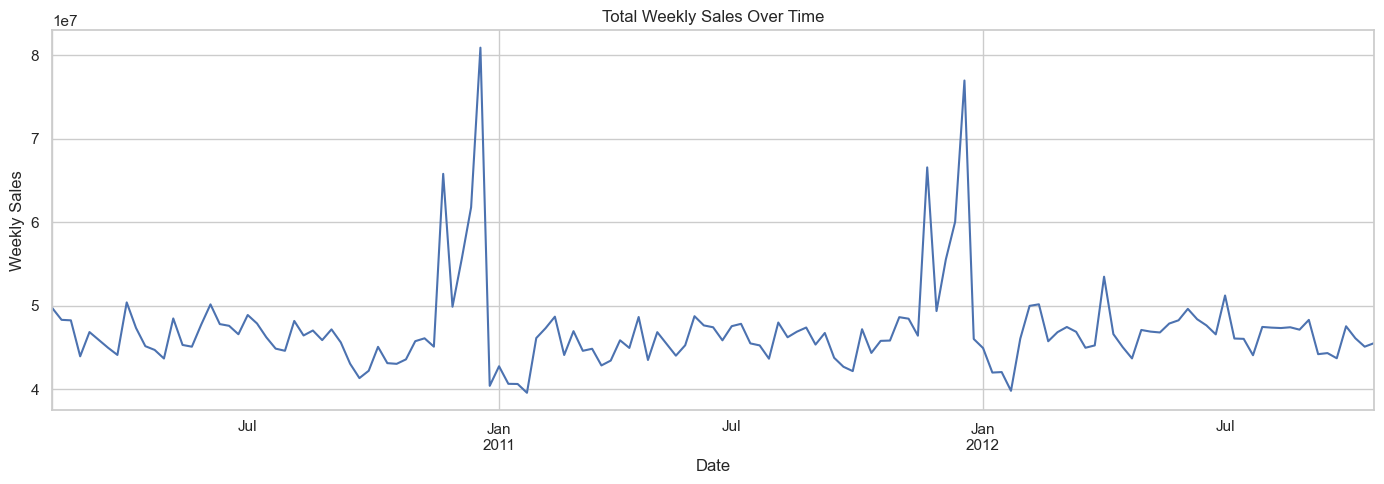

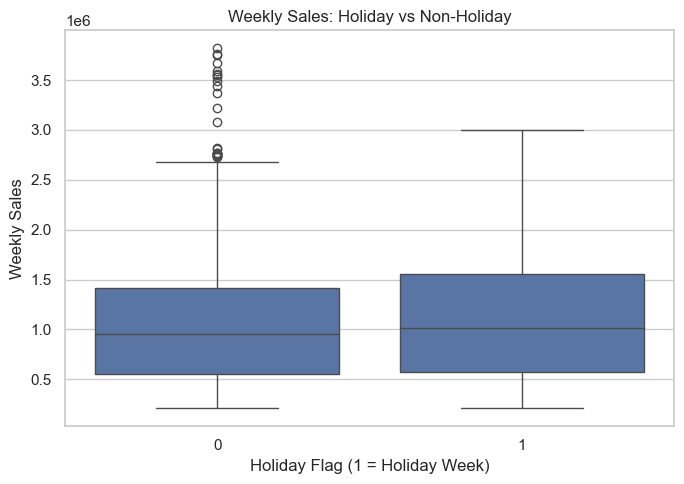

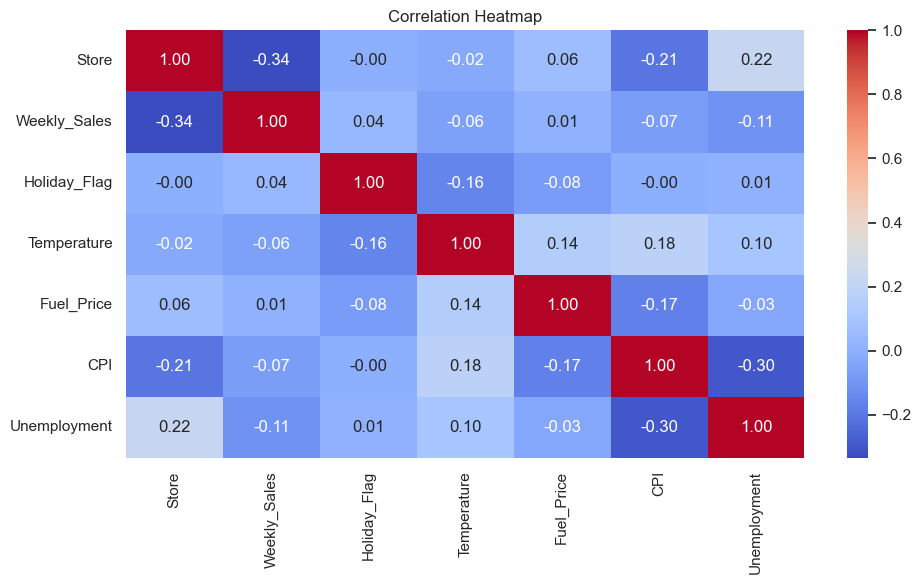

C:\Users\saransh\AppData\Local\Temp\ipykernel_19336\2217939217.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_sales_by_store.index, y=avg_sales_by_store.values, palette="viridis")


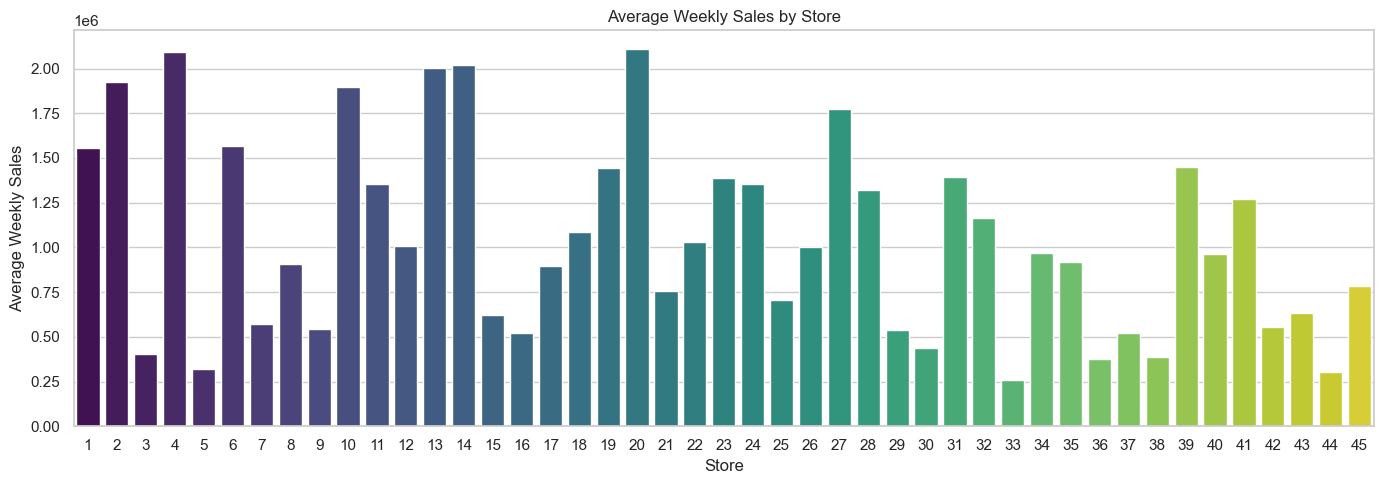

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Step 3.1: Weekly Sales Trend Over Time
plt.figure(figsize=(14, 5))
df_grouped_by_date = df.groupby("Date")["Weekly_Sales"].sum()
df_grouped_by_date.plot()
plt.title("Total Weekly Sales Over Time")
plt.ylabel("Weekly Sales")
plt.xlabel("Date")
plt.tight_layout()
plt.grid(True)
plt.show()

# Step 3.2: Holiday vs Non-Holiday Sales
plt.figure(figsize=(7, 5))
sns.boxplot(x="Holiday_Flag", y="Weekly_Sales", data=df)
plt.title("Weekly Sales: Holiday vs Non-Holiday")
plt.xlabel("Holiday Flag (1 = Holiday Week)")
plt.ylabel("Weekly Sales")
plt.tight_layout()
plt.show()

# Step 3.3: Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Step 3.4: Average Weekly Sales by Store
plt.figure(figsize=(14, 5))
avg_sales_by_store = df.groupby("Store")["Weekly_Sales"].mean().sort_values(ascending=False)
sns.barplot(x=avg_sales_by_store.index, y=avg_sales_by_store.values, palette="viridis")
plt.title("Average Weekly Sales by Store")
plt.xlabel("Store")
plt.ylabel("Average Weekly Sales")
plt.tight_layout()
plt.show()
